# Color Quantization using K-Means Clustering

Color quantization finds a small number of representative colors within a given picture. Each pixel yields one 3-dimensional vector in the RGB color space. Using K-means we can cluster all the pixels of an image into K clusters and assign each pixel the color represented by its nearest cluster center. Thereby, an image containing millions of colors can be compressed to an image containing K different colors only.
- Load an image of your choice, treat each pixel as an individual 3- dimensional data point and cluster them into K clusters
- Assign each pixel the color value of its nearest cluster center
- Visualize the result

In [1]:
import cv2 as cv

# Load an image of your choice
img = cv.imread('fruit3.jpg')
print(img.shape)

(390, 504, 3)


In [13]:
from sklearn.cluster import KMeans

x = img.reshape((-1, 3))
print(x.shape)

numb_color = 2

model = KMeans(n_clusters=numb_color)
model.fit(x)

(196560, 3)


/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [14]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np

print('New colors:', model.cluster_centers_)
print('Labels:', model.labels_)


New colors: [[ 38.57816496 154.05988214 212.81489022]
 [ 25.68536097  42.68702058  98.53319233]]
Labels: [1 1 1 ... 1 1 1]


In [15]:
# Create a new image
new_img = np.zeros_like(x)
for i in range(len(x)):
    new_img[i] = model.cluster_centers_[model.labels_[i]]

new_img = new_img.reshape(img.shape)

(-0.5, 503.5, 389.5, -0.5)

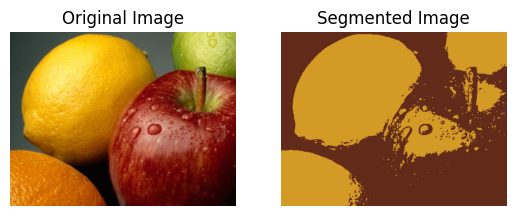

In [16]:
# Display 2 images in one row
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
